<strong>train data에 대한 EDA 수행 <br></strong>
기간 : 2018년 1월 1일 ~ 2020년 12월 31일 <br>
데이터셋 생성조건 : (거래대금 1조,1000억, 100억, 10억,1억), 거래일 10일, next_change 0.02

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import pymysql
import warnings
warnings.filterwarnings(action='ignore')

# 시각화 라이브러리
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import cufflinks as cf
cf.go_offline(connected = True)
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 세부 옵션
pd.set_option('display.max_columns', 600)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False


# 데이터셋 생성
## 함수 불러오기

In [1]:
def make_data(trading, days, target): 
    # 코드 리스트 
   
    IF=open("../../data/code_list.txt", 'r')
    lst_code = IF.readlines()
    

    lst_dataX = []
    lst_dataY = []
    lst_data = []
    lst_target = []
    
    # database


    con = pymysql.connect(

    )
    cursor = con.cursor()
 
    for line in tqdm(lst_code): 
        code = line.strip()
        sql_query = '''
                    SELECT *
                    FROM stock_{}
                    WHERE Date
                    BETWEEN '2018-01-01' AND '2020-12-31'
                    '''.format(code)
        stock = pd.read_sql(sql = sql_query, con = con)
        lst_stock = stock.values.tolist()  


        for i, row in enumerate(lst_stock): 
            date, close, volume = row[0].strftime('%Y%m%d'), row[4], row[5]
            # 거래대금, 이동평균선 범위 조건
            if (close * volume >= trading*100000000) :
                if i < (days-1):   # 예외 처리 
                    continue                               

                lst_result = []
                
                Ddays_date = lst_stock[i-(days-1):i+1]
                                           
                for row2 in Ddays_date:
                    Open,High,Low,Close,Volume = row2[1:6]
                    Trading = Close * Volume
                    lst_result += [Open,High,Low,Close,Trading]

                rate = float(row[6])
                y = int(row[6] >= target)
                data = ','.join(map(str,lst_result))
                
                lst_dataX.append(data)
                lst_dataY.append(y)
                lst_data.append([code,date,data,y])
                lst_target.append(rate)
    return np.array(lst_dataX), np.array(lst_dataY),pd.DataFrame(lst_data),np.array(lst_target)

In [7]:
dataX, dataY, data , target = make_data(1,10,0.02)

100%|██████████████████████████████████████████████████████████████████████████████| 1561/1561 [03:52<00:00,  6.70it/s]


In [8]:
data.columns = ['code','date','trading','label']

In [9]:
code2date = data[['code','date']]

In [10]:
lst = []
for line in data['trading']:
    lst.append(list(map(int, str(line).split(','))))

In [11]:
lst_columns = []
for i in range(9,-1,-1):
    for val in ['Open','High','Low','Close','trading_val']:
        lst_columns.append(f'{val}_D-{i}')

In [12]:
df2 = pd.DataFrame(lst, columns = lst_columns)
df2.head()

,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0
0,10250,12050,10150,11800,307823874200,11950,12450,10900,11750,240410569500,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000
1,11950,12450,10900,11750,240410569500,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700
2,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050
3,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200
4,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550


In [13]:
df_Y = pd.DataFrame(dataY, columns = ['Y'])
df_target = pd.DataFrame(target, columns = ['target'])

In [14]:
df = pd.concat([code2date, df2,df_target,df_Y], axis = 1)
df.head()

,code,date,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0,target,Y
0,050120,20180115,10250,12050,10150,11800,307823874200,11950,12450,10900,11750,240410569500,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,0.124088,1
1,050120,20180116,11950,12450,10900,11750,240410569500,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,-0.068182,0
2,050120,20180117,11850,14150,11600,12600,764364560400,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,-0.188153,0
3,050120,20180118,12800,13200,12000,12200,170010147600,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,0.047210,1
4,050120,20180119,12450,13400,12350,12850,211661434950,12800,12950,11300,11700,91801277100,11650,15200,11500,15200,602627879200,13900,18950,11650,12950,1439759321700,15300,15400,12650,13700,789063638200,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550,0.012295,0


 ## 거래대금별 데이터 개수 알아보기
 - ipywidgets을 사용하여 거래대금을 조정하고 데이터 개수를 알아본다.

In [21]:
@interact
def show_data_more_than(data = df, column=['trading_val_D-0'], 
                        x=[10,100,1000,10000]):
    print(df.loc[df['trading_val_D-0']>= (x*100000000)].shape)
    return  df.loc[df['trading_val_D-0']>= (x*100000000)]

interactive(children=(Dropdown(description='data', options=('code', 'date', 'Open_D-9', 'High_D-9', 'Low_D-9',…

# EDA

## 거래대금별 Next Change 값 분포


- 거래대금이 낮아질 수록 뾰족한 라플라스 분포의 형태에 가까워진다.
- 1000억 ~ 1조 구간의 특징 : 전체 종목 대비 급상승한 종목이 많다. ( 0.3 근방 구간 막대 참고)

→ 특성이 다르게 나타나므로 거래대금별로 학습을 진행한다.

- 모든 구간에서 히스토그램 막대가 급격하게 떨어지는 지점이 존재한다. (0.01~ 0.02 구간)

→ 해당 구간을 기점으로 상승 여부를 이진화하여 데이터셋을 구축한다.

In [42]:
@interact
def visualize_next_change(c= [10000,1000,100,10]):
    df_stock = df.loc[df['trading_val_D-0'] > c *100000000]
    
    df_stock['target'].iplot(kind="histogram", bins=100, theme="white", yTitle='Count')

interactive(children=(Dropdown(description='c', options=(10000, 1000, 100, 10), value=10000), Output()), _dom_…

## 거래대금별 label 값 분포

- label 0 : 다음날 종가 상승률 2% 미만 
- label 1 : 다음날 종가 상승률 2% 이상
- 거래대금 1조~1천억에서 라벨의 분포가 비슷하게 나타난다.<br>
- 거래대금이 낮아질수록 라벨의 분포가 차이나지만 불균형을 걱정할 정도는 아니다.
- ipywidgets을 사용하여 거래대금을 조정하고 라벨값의 분포를 알아본다.

In [40]:
@interact
def visualize_label(c= [10000,1000,100,10]):
    df_stock = df.loc[df['trading_val_D-0'] > c * 100000000]
    
    ax = sns.countplot(data = df_stock, x = 'Y')
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 20)
    plt.show()

interactive(children=(Dropdown(description='c', options=(10000, 1000, 100, 10), value=10000), Output()), _dom_…

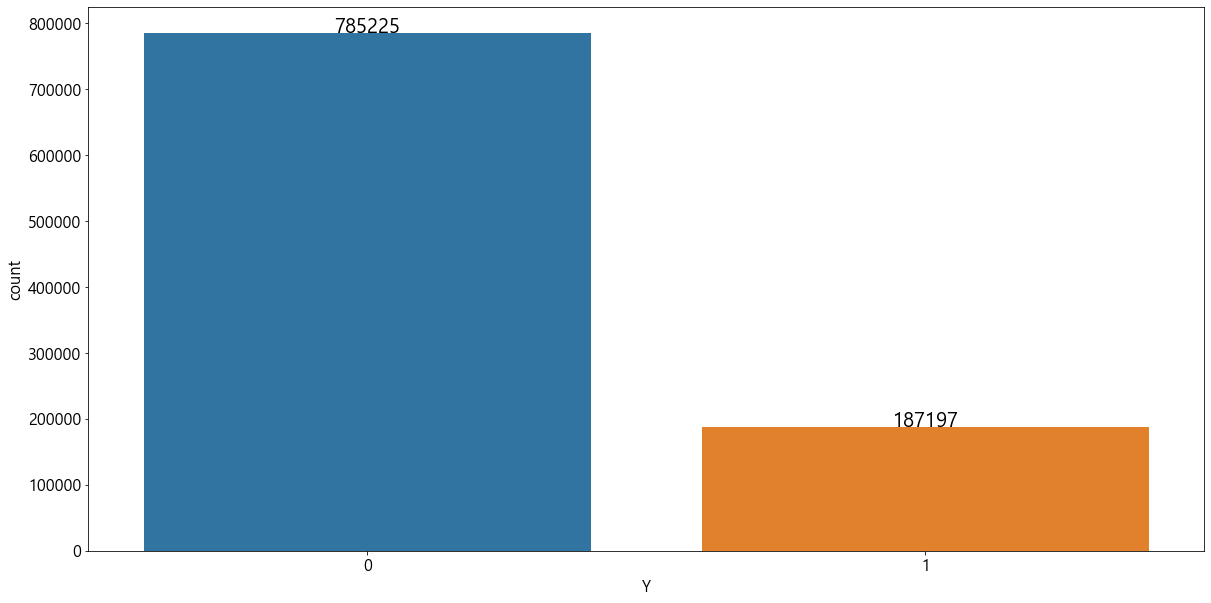

In [23]:
ax = sns.countplot(data = df_Y, x = 'Y')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 20)
plt.show()

## 거래대금별 이상치 탐색

<strong>min값을 살펴보면 10일간의 거래일동안 주가와 거래대금에 0 값이 존재함을 알 수 있음.<br></strong>

In [36]:
# 기술통계값
df.describe()

,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0,target,Y
count,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,9.724220e+05,972422.000000,972422.000000
mean,2.390520e+04,2.434499e+04,2.347437e+04,2.390356e+04,8.377226e+09,2.390667e+04,2.434640e+04,2.347558e+04,2.390381e+04,8.394424e+09,2.390801e+04,2.434807e+04,2.347688e+04,2.390470e+04,8.408686e+09,2.390955e+04,2.434982e+04,2.347862e+04,2.390612e+04,8.427091e+09,2.391170e+04,2.435216e+04,2.348005e+04,2.390665e+04,8.444804e+09,2.391276e+04,2.435379e+04,2.348078e+04,2.390682e+04,8.463506e+09,2.391375e+04,2.435531e+04,2.348165e+04,2.390716e+04,8.480891e+09,2.391575e+04,2.435740e+04,2.348311e+04,2.390697e+04,8.495732e+09,2.391664e+04,2.435932e+04,2.348363e+04,2.390670e+04,8.507001e+09,2.391976e+04,2.436492e+04,2.348463e+04,2.390661e+04,8.535300e+09,0.000808,0.192506
std,7.367134e+04,7.475606e+04,7.261039e+04,7.366178e+04,6.174353e+10,7.366421e+04,7.474724e+04,7.260231e+04,7.365223e+04,6.180414e+10,7.365663e+04,7.473902e+04,7.259409e+04,7.364396e+04,6.184688e+10,7.364824e+04,7.473119e+04,7.258843e+04,7.363939e+04,6.192510e+10,7.364284e+04,7.472640e+04,7.258283e+04,7.363326e+04,6.199434e+10,7.363631e+04,7.472001e+04,7.257593e+04,7.362608e+04,6.207540e+10,7.362959e+04,7.471278e+04,7.256950e+04,7.361911e+04,6.218048e+10,7.362307e+04,7.470419e+04,7.256258e+04,7.361040e+04,6.233673e+10,7.361332e+04,7.469565e+04,7.255378e+04,7.360150e+04,6.237236e+10,7.360619e+04,7.468847e+04,7.254551e+04,7.359389e+04,6.246083e+10,0.037095,0.394268
min,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.070000e+02,0.000000e+00,1.090000e+02,1.150000e+02,1.030000e+02,1.070000e+02,1.000008e+08,-0.300135,0.000000
25%,3.030000e+03,3.110000e+03,2.963000e+03,3.035000e+03,3.549776e+08,3.030000e+03,3.110000e+03,2.965000e+03,3.035000e+03,3.563069e+08,3.035000e+03,3.115000e+03,2.965000e+03,3.035000e+03,3.577201e+08,3.035000e+03,3.115000e+03,2.970000e+03,3.040000e+03,3.591739e+08,3.040000e+03,3.120000e+03,2.970000e+03,3.040000e+03,3.607528e+08,3.040000e+03,3.120000e+03,2.970000e+03,3.040000e+03,3.626775e+08,3.040000e+03,3.120000e+03,2.970000e+03,3.040000e+03,3.646135e+08,3.040000e+03,3.121000e+03,2.972000e+03,3.040000e+03,3.672026e+08,3.045000e+03,3.125000e+03,2.975000e+03,3.040000e+03,3.703860e+08,3.045000e+03,3.130000e+03,2.975000e+03,3.041000e+03,3.739353e+08,-0.015748,0.000000
50%,6.600000e+03,6.760000e+03,6.440000e+03,6.600000e+03,1.111256e+09,6.600000e+03,6.760000e+03,

In [37]:
min(df['trading_val_D-1'])

0

In [38]:
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_rows', 5000)

<strong>다음날 종가변화율이 -30%,30%를 넘어가는 값이 있는지 찾아보기.</strong><br>
나타나지 않음

In [39]:
@interact
def next_change_outlier(col1 = ['target'], col2 = ['trading_val_D-0'],trading_val = [10000,1000,100,10],
                        lower = (-0.3, 0.31,0.05), upper = (-0.3, 0.31,0.05)):
    return df.loc[((df[col1] < lower) | (df[col1] > upper) ) & (df[col2] > trading_val * 100000000)]

interactive(children=(Dropdown(description='col1', options=('target',), value='target'), Dropdown(description=…

# 주식 종목 시각화 해보기
- <strong> 10일간의 거래일동안 주가와 거래대금이 0인 종목 시각화 해보기</strong>

###  함수 이용 & DatePicker 사용

In [24]:
import FinanceDataReader as fdr

def load_stock(code, start_date, end_date):
    stock = fdr.DataReader(code, start_date, end_date)
    
    stock
    
    print('')
    stock[stock.columns[:4]].iplot(kind = 'line')
    # volume
    stock[stock.columns[4]].iplot(kind = 'line')    
    print((end_date-start_date))
    

In [26]:
interact(load_stock, code = '005930' ,

            start_date=widgets.DatePicker(value=datetime.date(2018,1,1)),
            end_date=widgets.DatePicker(value=datetime.date(2019,1,1)));

interactive(children=(Text(value='005930', description='code'), DatePicker(value=datetime.date(2018, 1, 1), de…

In [25]:
import FinanceDataReader as fdr

# 삼성전자
df_samsung = fdr.DataReader('005930', start = '2018-02-01', end = '2018-06-30')
df_samsung.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-02-01,50620,50960,49720,49820,552189,-0.001603
2018-02-02,49380,49400,47700,47700,585207,-0.042553
2018-02-05,46500,48320,46000,47920,567158,0.004612
2018-02-06,46600,47920,46580,47420,388129,-0.010434
2018-02-07,48240,48260,45800,45800,468961,-0.034163
2018-02-08,46120,46620,45980,46000,465021,0.004367
2018-02-09,44440,45180,44420,44700,349300,-0.028261
2018-02-12,45100,46320,45040,45720,315099,0.022819
2018-02-13,46200,48060,46200,47540,378465,0.039808


## 삼성전자 주가 시각화
- 2018년 2월 1일 ~ 2018년 6월 30일까지 시각화
- 종가를 제외한 주가에서 모두 O으로 나타남
- iplot 활용

In [27]:
min(df_samsung['Volume'])

0

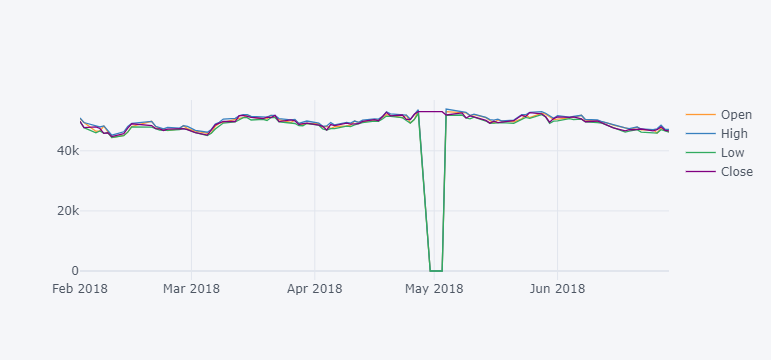

In [34]:
# 거래대금 제외 데이터 
df_samsung[df_samsung.columns[:4]].iplot(kind = 'line')

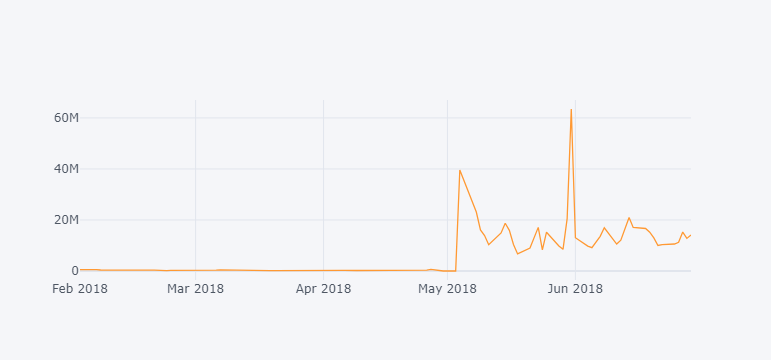

In [29]:
df_samsung['Volume'].iplot(kind = 'line')

삼성전자는 기존의 1주를 50주로 쪼개는 액면분할을 실시하여 4.30 ~ 5.2일까지 거래정지기간으로 나타났다.<br>

## 신풍제약 주가 시각화
- 2020년 7월 1일 ~ 2020년 11월 30일까지 시각화
- 종가를 제외한 주가에서 모두 O으로 나타남
- iplot 활용

In [30]:
import FinanceDataReader as fdr

# 신풍제약
df_sinpung = fdr.DataReader('019170', start = '2020-07-01', end = '2020-11-30')
df_sinpung.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-01,30400,31150,29150,29250,2957350,-0.031457
2020-07-02,29300,29850,28900,29300,1429912,0.001709
2020-07-03,29300,31300,28900,29550,3505959,0.008532
2020-07-06,30100,32000,29750,31050,5148966,0.050761
2020-07-07,31400,39700,31050,37950,28716072,0.222222
2020-07-08,39000,44600,38500,39400,15686852,0.038208
2020-07-09,40250,42850,39500,41150,8047240,0.044416
2020-07-10,42100,52900,40800,48650,21832615,0.182260
2020-07-13,51300,60600,50100,60300,13164176,0.239466


In [31]:
min(df_sinpung['Volume'])

0

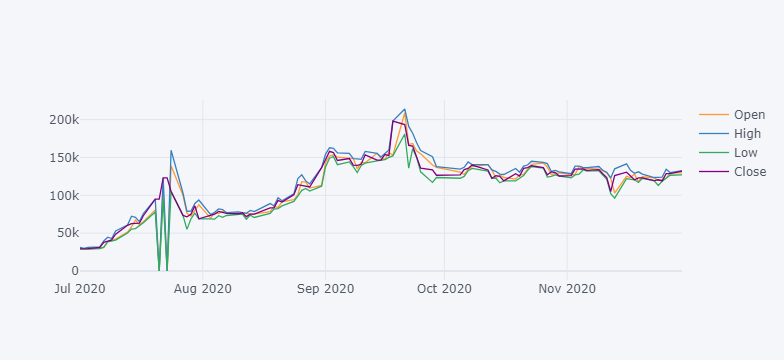

In [32]:
df_sinpung[df_sinpung.columns[:4]].iplot(kind = 'line')

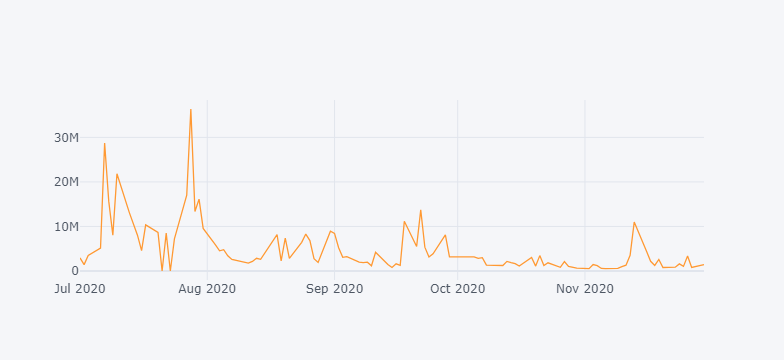

In [33]:
df_sinpung['Volume'].iplot(kind = 'line')

코로나 19사태로 인해 백신개발 관련 종목들이 급등하면서 6월 21일, 6월 23일 매매거래가 정지되었다.<br>
이와 같이 특수한 상황인 경우 모델이 다음 날 수익률을 예측하는데 어려움을 가질 수 있으므로 해당 데이터를 제거한다.<br>
앞선 시각화에서 매매거래 정지와 같이 특수한 상황으로 Low값이 0으로 나타나는 경우가 있으므로, <br>
데이터셋 구축 시 조건을 충족하는 데이터에 대해 학습을 진행한다.